In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import numpy as np
import statsmodels.api as sma

from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDRegressor, Ridge, LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA 


import time # used for seeing the timing of models
from sklearn.linear_model import LogisticRegression

from sklearn import metrics

from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score


In [2]:
## Loading data set
train = pd.read_csv("Data_Train.csv")
train


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
test = pd.read_csv("Test_set.csv")
test


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info


In [4]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


# Pre-processing/ Cleaning

In [6]:
## About data

train.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
test.describe()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,2671,2671,2671,2671,2671,2671,2671,2671,2671,2671
unique,11,44,5,6,100,199,704,320,5,6
top,Jet Airways,9/05/2019,Delhi,Cochin,DEL ? BOM ? COK,10:00,19:00,2h 50m,1 stop,No info
freq,897,144,1145,1145,624,62,113,122,1431,2148


In [8]:
#data types

train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

In [9]:
test.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

In [10]:
# columns

train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [11]:
# checking Data null

train_null = train.isna().sum() [train.isna().sum() > 1]
train_null

Series([], dtype: int64)

In [12]:
# drop all null

train = train.dropna(axis=0) 
train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU ? BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU ? BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR ? DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR ? DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [13]:
cat_cols = list(train.columns[train.nunique() < len(train) / 4])

In [14]:
len(cat_cols)

11

In [15]:
cat_cols

['Airline',
 'Date_of_Journey',
 'Source',
 'Destination',
 'Route',
 'Dep_Time',
 'Arrival_Time',
 'Duration',
 'Total_Stops',
 'Additional_Info',
 'Price']

In [16]:
# check info
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [17]:
# shown data frame only categorical columns 
catCol_train = train.filter(items = cat_cols)

In [18]:
train_num = train.filter(items=list(set(train.columns) - set(cat_cols)))
train_num.fillna(value=0, inplace=True)

In [19]:
train_num.isna().any()

Series([], dtype: bool)

In [20]:
train_num

""
0
1
2
3
4
...
10678
10679
10680
10681


In [21]:
## Cleaning

In [22]:
#Feature splitiing the Day, Month and Year from Date_of_Journey
train['Date']=train['Date_of_Journey'].str.split('/').str[0]
train['Month']=train['Date_of_Journey'].str.split('/').str[1]
train['Year']=train['Date_of_Journey'].str.split('/').str[2]

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3973241837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date']=train['Date_of_Journey'].str.split('/').str[0]
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3973241837.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month']=train['Date_of_Journey'].str.split('/').str[1]
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3973241837.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [23]:
#Converting Date, Month and Year into Integer
train['Date']=train['Date'].astype(int)
train['Month']=train['Month'].astype(int)
train['Year']=train['Year'].astype(int)

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1214858376.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Date']=train['Date'].astype(int)
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1214858376.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Month']=train['Month'].astype(int)
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1214858376.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
 11  Date             10682 non-null  int32 
 12  Month            10682 non-null  int32 
 13  Year             10682 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.1+ MB


In [25]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [26]:
# droping the Date of journey

train.drop(['Date_of_Journey'], axis=1, inplace=True)



C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\2596248958.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(['Date_of_Journey'], axis=1, inplace=True)


In [27]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019


In [28]:
# Mapping the stop number

train['Total_Stops']=train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\2550048878.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Total_Stops']=train['Total_Stops'].map({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4,np.nan:1})


In [29]:
# creaning the BLR -> 
train['Route']=train['Route'].str.replace('?','->')

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1484978437.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['Route']=train['Route'].str.replace('?','->')
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1484978437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Route']=train['Route'].str.replace('?','->')


In [30]:
train.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR -> DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,04:25 10 Jun,19h,2,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019


In [31]:
#Cleaning the arrival time Column Ex: 01:10 22 Mar -> we do not want the date here as we have a seperate field and also split the hour and min of Arrival Time

train['Arrival_Time']= train['Arrival_Time'].apply(lambda x:x.split(' ')[0])
train['Arrival_Hour']=train['Arrival_Time'].str.split(':').str[0]
train['Arrival_Min']=train['Arrival_Time'].str.split(':').str[1]

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\161943217.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Arrival_Time']= train['Arrival_Time'].apply(lambda x:x.split(' ')[0])
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\161943217.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Arrival_Hour']=train['Arrival_Time'].str.split(':').str[0]
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\161943217.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

In [32]:
#Converting the Arrival hour and Arrival minutes to Integer
train['Arrival_Hour']=train['Arrival_Hour'].astype(int)
train['Arrival_Min']=train['Arrival_Min'].astype(int)
train.head()

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3505527049.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Arrival_Hour']=train['Arrival_Hour'].astype(int)
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3505527049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Arrival_Min']=train['Arrival_Min'].astype(int)


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR -> DEL,22:20,01:10,2h 50m,0,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,13:15,7h 25m,2,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,04:25,19h,2,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,18:05,23:30,5h 25m,1,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,16:50,21:35,4h 45m,1,No info,13302,1,3,2019,21,35


In [33]:
## let drop the arrival time because we do not need now
train.drop(["Arrival_Time"], axis= 1, inplace = True)

train. head()


C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\3222081850.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(["Arrival_Time"], axis= 1, inplace = True)


,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min
0,IndiGo,Banglore,New Delhi,BLR -> DEL,22:20,2h 50m,0,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,05:50,7h 25m,2,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,09:25,19h,2,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,18:05,5h 25m,1,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,16:50,4h 45m,1,No info,13302,1,3,2019,21,35


In [34]:
# do same way of the dep time as arrival time


train['Departure_Time']=train['Dep_Time']
train['Departure_Hour']=train['Departure_Time'].str.split(':').str[0]
train['Departure_Min']=train['Departure_Time'].str.split(':').str[1]




C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\324661314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Departure_Time']=train['Dep_Time']
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\324661314.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Departure_Hour']=train['Departure_Time'].str.split(':').str[0]
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\324661314.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row

In [35]:
train['Departure_Hour']=train['Departure_Hour'].astype(int)
train['Departure_Min']=train['Departure_Min'].astype(int)


C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\2667747083.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Departure_Hour']=train['Departure_Hour'].astype(int)
C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\2667747083.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Departure_Min']=train['Departure_Min'].astype(int)


In [36]:
train.tail()

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Departure_Time,Departure_Hour,Departure_Min
10678,Air Asia,Kolkata,Banglore,CCU -> BLR,19:55,2h 30m,0,No info,4107,9,4,2019,22,25,19:55,19,55
10679,Air India,Kolkata,Banglore,CCU -> BLR,20:45,2h 35m,0,No info,4145,27,4,2019,23,20,20:45,20,45
10680,Jet Airways,Banglore,Delhi,BLR -> DEL,08:20,3h,0,No info,7229,27,4,2019,11,20,08:20,8,20
10681,Vistara,Banglore,New Delhi,BLR -> DEL,11:30,2h 40m,0,No info,12648,1,3,2019,14,10,11:30,11,30
10682,Air India,Delhi,Cochin,DEL -> GOI -> BOM -> COK,10:55,8h 20m,2,No info,11753,9,5,2019,19,15,10:55,10,55


In [37]:
# drop deptime

train.drop('Dep_Time',axis=1,inplace=True)

C:\Users\nsade\AppData\Local\Temp\ipykernel_73052\1243418000.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop('Dep_Time',axis=1,inplace=True)


In [38]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Departure_Time,Departure_Hour,Departure_Min
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22:20,22,20
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2,No info,7662,1,5,2019,13,15,05:50,5,50
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h,2,No info,13882,9,6,2019,4,25,09:25,9,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18:05,18,5
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16:50,16,50


In [39]:
# checking now

train.loc[train.Departure_Hour <12,'Departure_Hour']=0
train.loc[(train.Departure_Hour >=12) & (train.Departure_Hour <=18),'Departure_Hour']=1
train.loc[train.Departure_Hour >18,'Departure_Hour']=2

In [40]:
train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Arrival_Hour,Arrival_Min,Departure_Time,Departure_Hour,Departure_Min
0,IndiGo,Banglore,New Delhi,BLR -> DEL,2h 50m,0,No info,3897,24,3,2019,1,10,22:20,2,20
1,Air India,Kolkata,Banglore,CCU -> IXR -> BBI -> BLR,7h 25m,2,No info,7662,1,5,2019,13,15,05:50,0,50
2,Jet Airways,Delhi,Cochin,DEL -> LKO -> BOM -> COK,19h,2,No info,13882,9,6,2019,4,25,09:25,0,25
3,IndiGo,Kolkata,Banglore,CCU -> NAG -> BLR,5h 25m,1,No info,6218,12,5,2019,23,30,18:05,1,5
4,IndiGo,Banglore,New Delhi,BLR -> NAG -> DEL,4h 45m,1,No info,13302,1,3,2019,21,35,16:50,1,50


# Visualization

 After preprocessing we can do the Visualization and Model 


<AxesSubplot:>

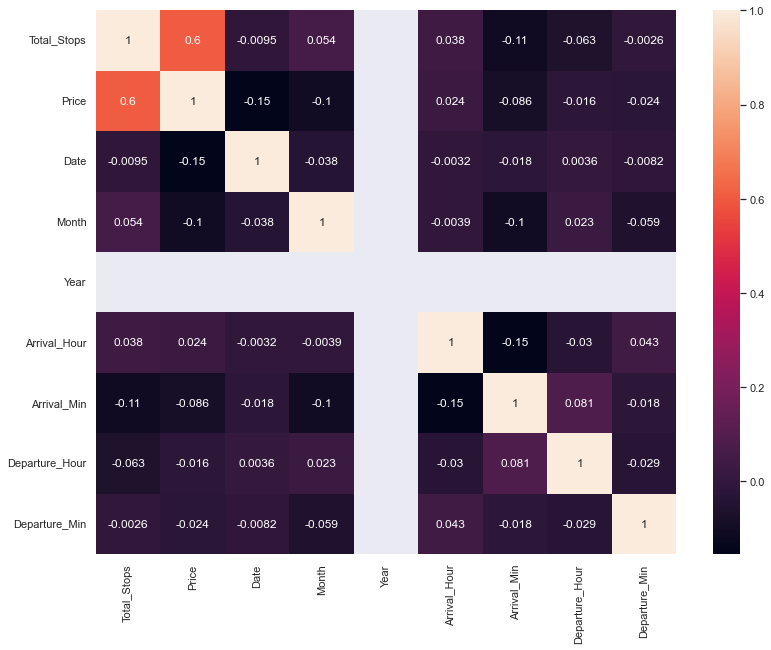

In [41]:
#correration

corr = train.corr() # allows us to get the correlations
sns.set(rc = {'figure.figsize':(13,10)})
sns.heatmap(corr, annot=True) # annot=True adds the values

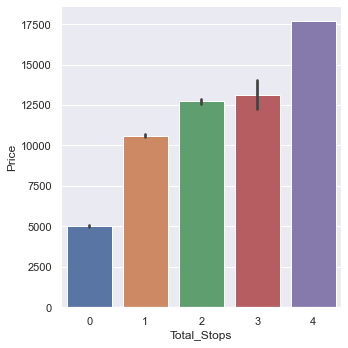

In [42]:
## Plot of total stops

sns.catplot(data=train, x='Total_Stops', y='Price',kind='bar')

<AxesSubplot:xlabel='Date', ylabel='Price'>

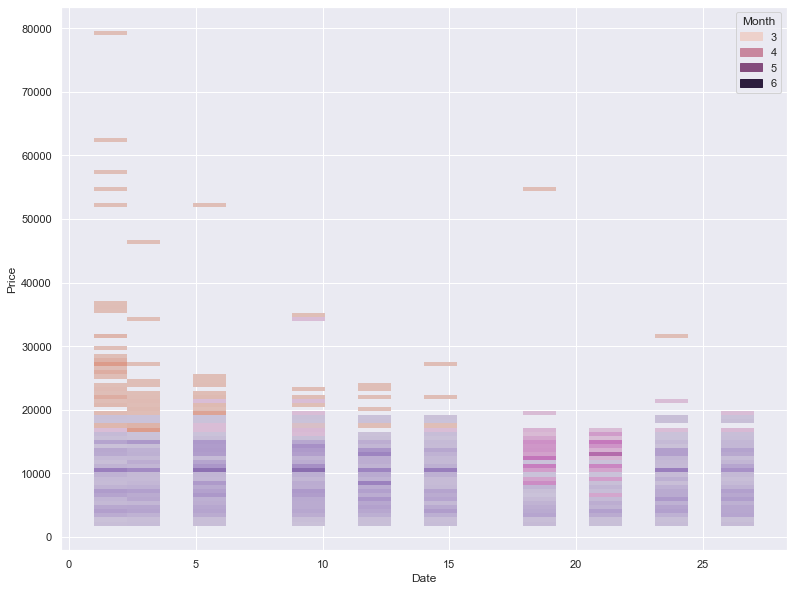

In [43]:
# plot a date 

sns.histplot(data=train,x='Date',y='Price',kde = True,hue = 'Month')

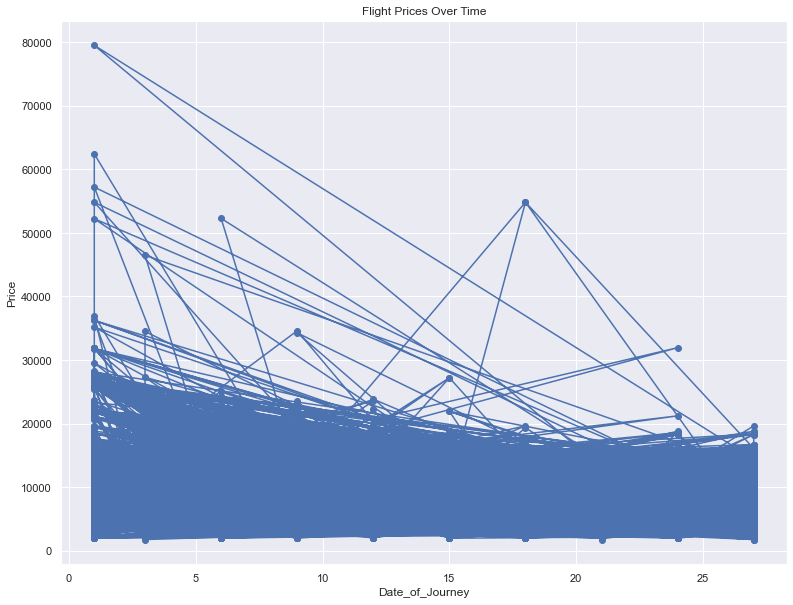

In [44]:
import matplotlib.pyplot as plt

plt.plot(train['Date'], train['Price'], marker='o', linestyle='-')
plt.title('Flight Prices Over Time')
plt.xlabel('Date_of_Journey')
plt.ylabel('Price')
plt.grid(True)
plt.show()

<AxesSubplot:ylabel='Airline'>

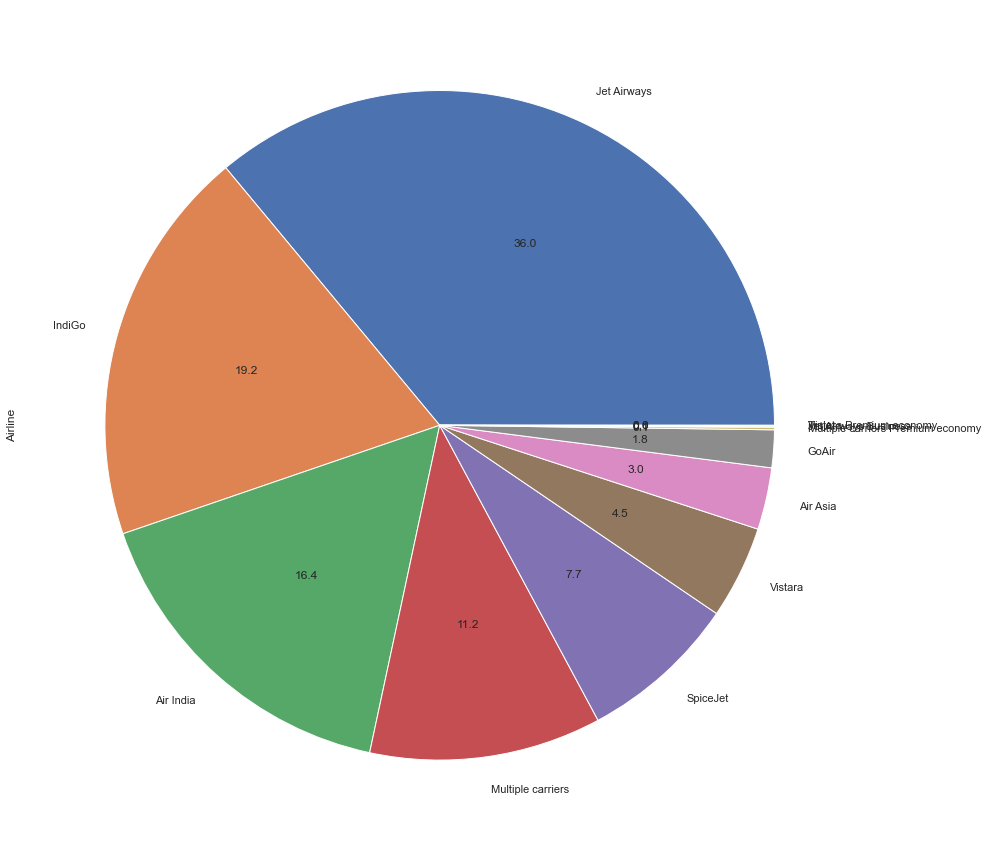

In [45]:
## Pie

train['Airline'].value_counts().plot.pie(y=train['Airline'],figsize=(15,16),autopct='%1.1f')

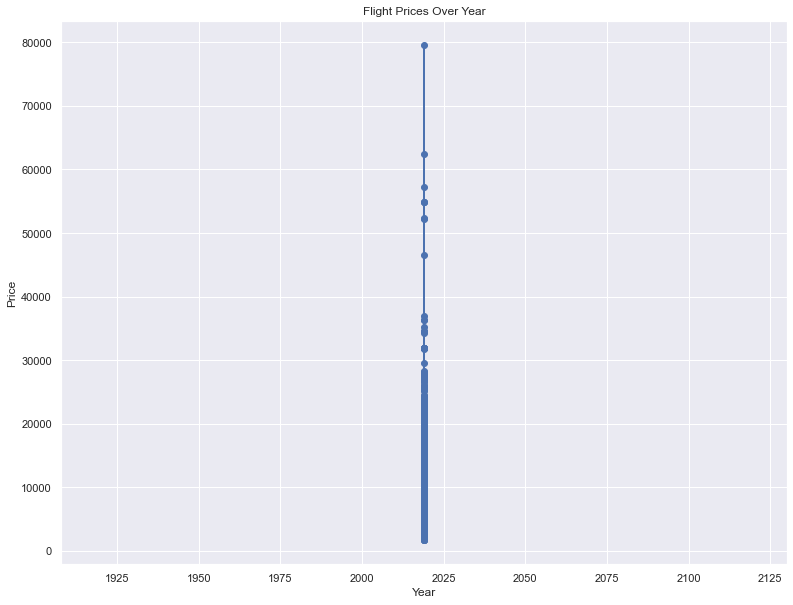

In [46]:
plt.plot(train['Year'], train['Price'], marker='o', linestyle='-')
plt.title('Flight Prices Over Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.grid(True)
plt.show()


##below we were playing around with different visualizations to see which one would present our findings
##and give us the results we were looking for

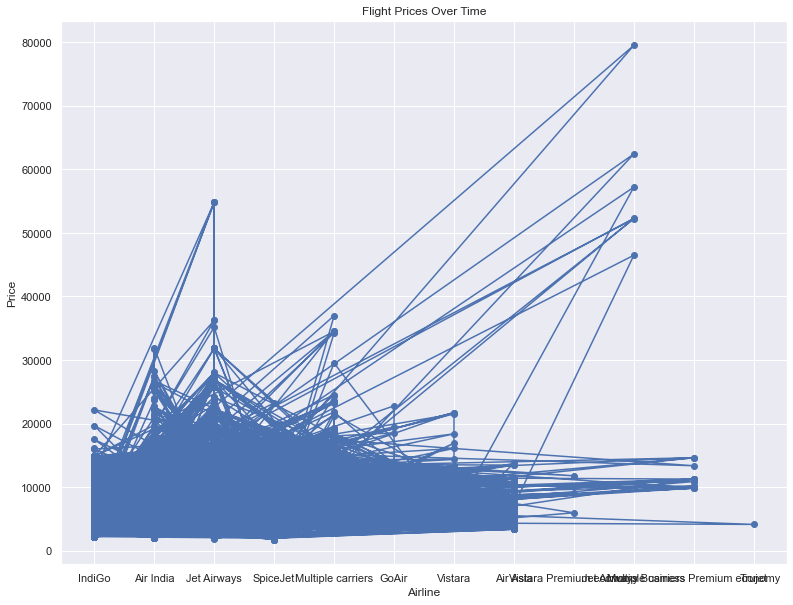

In [47]:
plt.plot(train['Airline'], train['Price'], marker='o', linestyle='-')
plt.title('Flight Prices Over Time')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.grid(True)
plt.show()

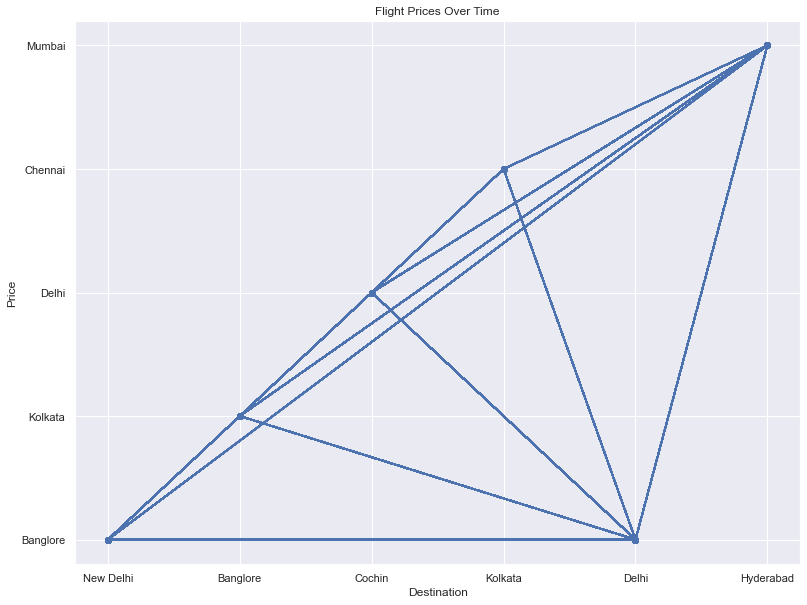

In [48]:
plt.plot(train['Destination'], train['Source'], marker='o', linestyle='-')
plt.title('Flight Prices Over Time')
plt.xlabel('Destination')
plt.ylabel('Price')
plt.grid(True)
plt.show()

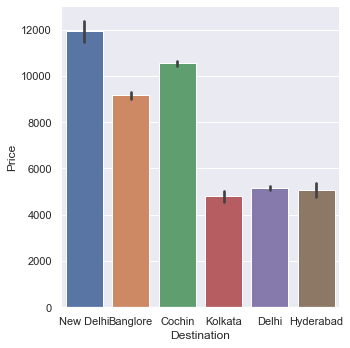

In [49]:
## Plot of price vs destination
sns.catplot(data=train,y='Price',x='Destination',kind='bar')

# Data Modeling

Sprint our data

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import pandas as pd

train = pd.read_csv("Data_Train.csv")

y = train['Price']
X = train.drop('Price', axis=1)

#categorical data
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 778)




In [51]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape## sprint shape

((8546, 2143), (8546,), (2137, 2143), (2137,))

In [52]:
 X

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Additional_Info_1 Long layover,Additional_Info_1 Short layover,Additional_Info_2 Long layover,Additional_Info_Business class,Additional_Info_Change airports,Additional_Info_In-flight meal not included,Additional_Info_No Info,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10679,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10680,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
10681,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [53]:

 y

0         3897
1         7662
2        13882
3         6218
4        13302
         ...  
10678     4107
10679     4145
10680     7229
10681    12648
10682    11753
Name: Price, Length: 10683, dtype: int64

Let Describe the linear regression

In [54]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [55]:
# predictions
y_pred = model.predict(X_test)

In [56]:
## We add a constant to allow OLS to take into account the y-intercept
X2 = sma.add_constant(X_train)

#create OLS model and fit it
est = sma.OLS(y_train, X2)
est2 = est.fit()

#call the summary
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.922
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     40.80
Date:                Tue, 12 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:10:11   Log-Likelihood:                -73303.
No. Observations:                8546   AIC:                         1.504e+05
Df Residuals:                    6628   BIC:                         1.640e+05
Df Model:                        1917                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [57]:
#look at the intercept and slope of the model. 
print('Model Intercept:',model.intercept_)
print('Model Slope:' ,model.coef_[0])

#Get our coefficient of determination
print('Coefficient of Determination:',model.score(X_test, y_test))

#creates table to show the features and their coefficients 
coeff_train = pd.DataFrame(model.coef_, X_test.columns, columns=['Coefficients'])
coeff_train

Model Intercept: 6600843307135843.0
Model Slope: -2885915835544361.5
Coefficient of Determination: -7.43030730401776e+20


,Coefficients
Airline_Air Asia,-2.885916e+15
Airline_Air India,-2.885916e+15
Airline_GoAir,-2.885916e+15
Airline_IndiGo,-2.885916e+15
Airline_Jet Airways,-2.885916e+15
...,...
Additional_Info_In-flight meal not included,-2.591200e+14
Additional_Info_No Info,-2.591200e+14
Additional_Info_No check-in baggage included,-2.591200e+14
Additional_Info_No info,-2.591200e+14


# Random forest Classifier

 Let's try Random Forest as a second model



In [58]:
from sklearn.model_selection import train_test_split

train = pd.read_csv("Data_Train.csv")

y = train['Price']
X = train.drop('Price', axis=1)

#categorical data
X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 778)


In [59]:
from sklearn.ensemble import RandomForestClassifier

rfr = RandomForestClassifier(n_estimators = 100,criterion="gini").fit(X_train, y_train)

prediction_rf01 = rfr.predict(X_test)

In [60]:
# value counts
train['Price'].value_counts()

10262    258
10844    212
7229     162
4804     160
4823     131
        ... 
14153      1
8488       1
7826       1
6315       1
12648      1
Name: Price, Length: 1870, dtype: int64

In [61]:
 def eval_prediction(pred, actual):
    index = 0
    correct = 0
    for outcome in actual:
        if pred[index] == outcome:
            correct += 1

        index+=1
    return correct

In [63]:
prediction_rf01 = rfr.predict(X_test)

accuracy_rf=eval_prediction(prediction_rf01, y_test)/len(X_test)*100
print(accuracy_rf)
print("Random Forest:", eval_prediction(prediction_rf01, y_test))
print("Random Forest:", '{0:.2f}'.format((eval_prediction(prediction_rf01, y_test)/len(X))*100),"%")
print(rfr.score(X_test,y_test))

53.34581188582125
Random Forest: 1140
Random Forest: 10.67 %
0.5334581188582125


# Evaluation 

 evaluete by using a different model and compare the results to the two models we completed.

In [73]:
# Evaluate to find precision, recall, f1-score,support, accuracy and confusion matrix

# Summary of the predictions made by the classifier



print(classification_report(y_test, prediction_rf01))
print('Confusion Matrix')
print(confusion_matrix(y_test, prediction_rf01))
# Accuracy score
print('accuracy is',accuracy_score(prediction_rf01,y_test))




              precision    recall  f1-score   support

        1759       0.00      0.00      0.00         1
        1965       0.85      1.00      0.92        11
        2017       0.71      1.00      0.83         5
        2050       0.00      0.00      0.00         3
        2071       0.00      0.00      0.00         0
        2175       0.00      0.00      0.00         2
        2227       0.80      0.89      0.84         9
        2228       0.00      0.00      0.00         2
        2385       1.00      1.00      1.00         1
        2437       0.00      0.00      0.00         1
        2470       0.00      0.00      0.00         1
        2575       0.00      0.00      0.00         3
        2753       0.00      0.00      0.00         1
        2754       0.50      0.67      0.57         9
        2759       0.00      0.00      0.00         1
        3100       0.53      1.00      0.69         9
        3145       0.00      0.00      0.00         1
        3173       0.00    

C:\Users\nsade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsade\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\nsade\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [65]:
# evaluate as second to find MAE, MSE, RMSE, and ACCURACY

from sklearn import metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = metrics.mean_squared_error(y_test, y_pred,squared = False)
accuracy = rmse*100/y_test.mean()
print('Mean Absolute Error:', mae)
print('Mean Square Error:', mse)
print('Root Mean Square Error:', rmse)
print('Accuracy:', accuracy)

Mean Absolute Error: 6097745831509.854
Mean Square Error: 1.617515892751543e+28
Root Mean Square Error: 127181598226769.55
Accuracy: 1410458509611.0947
